In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Twitter API Credentials

In [2]:
consumer_key= "your_consumer_key"    
consumer_secret= "your_consumer_key_secret"
access_token= "your_access_token"    
access_token_secret= "your_access_token_secret"

#### Authentication Object and Access Tokens

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

#### Extract 200 tweets from amazon's twitter account
#### Print The Last 5 tweets from the account

In [4]:
posts = api.user_timeline(screen_name="elonmusk", count= 200, lang="en", tweet_mode="extended")

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1

Unexpected parameter: lang


Show the 5 recent tweets: 

1) @BillyM2k Maybe this year isn’t out of the question …

2) @BillyM2k Haha that’s next year

3) SpaceX Falcon 🚀 team is making excellent progress – aiming for 60 launches this year!

4) RT @SpaceX: Payloads for our upcoming fourth dedicated smallsat rideshare mission – Transporter-4 – were encapsulated into Falcon 9’s fairi…

5) We’ve all been there



#### Creating a  dataframe with a column called Tweets and Showing the first 5 rows of the data

In [5]:
dframe = pd.DataFrame ( [tweet.full_text for tweet in posts], columns=['Tweets'])

dframe.head()

,Tweets
0,@BillyM2k Maybe this year isn’t out of the que...
1,@BillyM2k Haha that’s next year
2,SpaceX Falcon 🚀 team is making excellent progr...
3,RT @SpaceX: Payloads for our upcoming fourth d...
4,We’ve all been there


#### Cleaning the text

In [6]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removing @mentions
    text = re.sub(r'#','', text) #Removing the # symbol
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Removing the Hyper Link
    
    return text

dframe['Tweets'] = dframe['Tweets'].apply(cleanTxt)
dframe

,Tweets
0,Maybe this year isn’t out of the question …
1,Haha that’s next year
2,SpaceX Falcon 🚀 team is making excellent progr...
3,: Payloads for our upcoming fourth dedicated s...
4,We’ve all been there
...,...
195,🇺🇦🇺🇦🇺🇦 Hold Strong Ukraine 🇺🇦🇺🇦🇺🇦
196,"Obviously, this would negatively affect Tesla,..."
197,"Hate to say it, but we need to increase oil &a..."
198,_4 _Brandenburg Haha sure :)


#### Creating a function to get the subjectivity and polarity

In [7]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

dframe['Subjectivity'] = dframe['Tweets'].apply(getSubjectivity)
dframe['Polarity'] = dframe['Tweets'].apply(getPolarity)

dframe

,Tweets,Subjectivity,Polarity
0,Maybe this year isn’t out of the question …,0.000000,0.000000
1,Haha that’s next year,0.150000,0.100000
2,SpaceX Falcon 🚀 team is making excellent progr...,1.000000,1.000000
3,: Payloads for our upcoming fourth dedicated s...,0.000000,0.000000
4,We’ve all been there,0.000000,0.000000
...,...,...,...
195,🇺🇦🇺🇦🇺🇦 Hold Strong Ukraine 🇺🇦🇺🇦🇺🇦,0.733333,0.433333
196,"Obviously, this would negatively affect Tesla,...",0.314286,-0.075000
197,"Hate to say it, but we need to increase oil &a...",0.966667,-0.044444
198,_4 _Brandenburg Haha sure :),0.729630,0.400000


#### Ploting the wordcloud

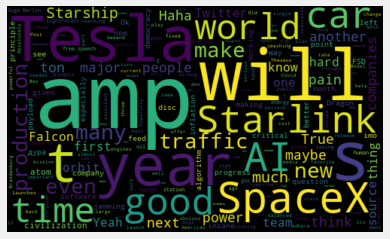

In [8]:
allWords = ' '.join([twts for twts in dframe['Tweets']])
wordCloud = WordCloud(width= 500, height= 300,  random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

#### Creating a function to Compute the negative, neutral and positive analysis

In [9]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
dframe['Analysis'] = dframe['Polarity'].apply(getAnalysis)

dframe

,Tweets,Subjectivity,Polarity,Analysis
0,Maybe this year isn’t out of the question …,0.000000,0.000000,Neutral
1,Haha that’s next year,0.150000,0.100000,Positive
2,SpaceX Falcon 🚀 team is making excellent progr...,1.000000,1.000000,Positive
3,: Payloads for our upcoming fourth dedicated s...,0.000000,0.000000,Neutral
4,We’ve all been there,0.000000,0.000000,Neutral
...,...,...,...,...
195,🇺🇦🇺🇦🇺🇦 Hold Strong Ukraine 🇺🇦🇺🇦🇺🇦,0.733333,0.433333,Positive
196,"Obviously, this would negatively affect Tesla,...",0.314286,-0.075000,Negative
197,"Hate to say it, but we need to increase oil &a...",0.966667,-0.044444,Negative
198,_4 _Brandenburg Haha sure :),0.729630,0.400000,Positive


#### Print all of the positive tweets

In [10]:
j=1
sortedDFrame = dframe.sort_values(by=['Polarity'])
for i in range(0, sortedDFrame.shape[0]):
    if(sortedDFrame['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDFrame['Tweets'][i])
        print()
        j = j + 1

1)  Haha that’s next year

2) SpaceX Falcon 🚀 team is making excellent progress – aiming for 60 launches this year!

3) Covid-19 is the virus of Theseus.

How many gene changes before it’s not Covid-19 anymore?

I supposedly have it again (sigh), but almost no symptoms.

4)  The Washington Post’s current slogan is “Democracy Dies in Darkness”. Catchy – for sure – but then what’s up with the paywall for news!?

5)  I usually drive an alpha build, but switch to beta right before release so I know what Tesla owners are getting

6)  TikTok feels like such an obvious AI attack that it’s annoying. 

I prefer to be attacked by AI with subtlety – maybe a rose, some candles, wine, Barry White, witty banter, that sort of thing …

7)  Funny to think that sapphire is just corroded aluminum!

8)  This is pretty good. 10.12 will have major improvements for tricky unprotected lefts &amp; heavy traffic in general. We’re also making good progress with single stack.

9)  True

10)  Haha that would sickk

#### Print The Negative Tweets

In [11]:
j=1
sortedDFrame = dframe.sort_values(by=['Polarity'])
for i in range(0, sortedDFrame.shape[0]):
    if(sortedDFrame['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDFrame['Tweets'][i])
        print()
        j = j+1

1)  Am giving serious thought to this

2)  Especially seek negative feedback

3)  Starlink, at least so far, has resisted all hacking &amp; jamming attempts

4) The movie Gaslight has gaslit so many people it’s insane

5)  You mean email?

6)  Main Tesla subjects will be scaling to extreme size, which is needed to shift humanity away from fossil fuels, and AI.

But I will also Include sections about SpaceX, Tesla and The Boring Company.

7)  Prototypes are easy, production is hard. 

Making an electric car was not the hard part of Tesla – dozens of companies have done that.

8)  Took us way too long

9) __Mania  Yeah, I did manage to throw the world champion sumo wrestler, but at the cost of smashing a disc in my neck that caused me insane back pain for 7 years!

10)  I am absolutely serious

11) I hereby challenge
Владимир Путин 
to single combat

Stakes are Україна

12) What are your thoughts about probable inflation rate over next few years?

13)    Cereal, but maybe I’ve been doing

#### Plotting the Polarity and Subjectivity 

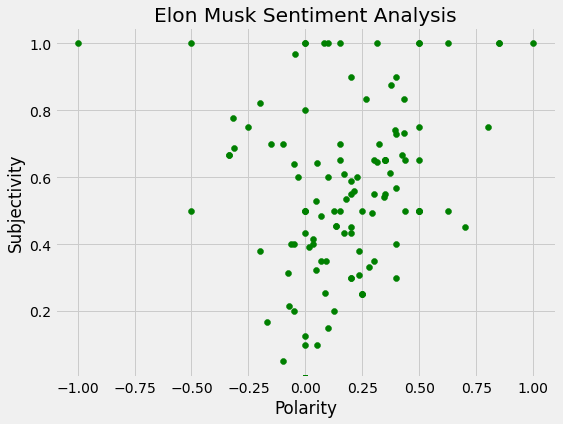

In [12]:
plt.figure(figsize=(8,6))
for i in range(0, dframe.shape[0]):
    plt.scatter(dframe['Polarity'][i], dframe['Subjectivity'][i], color='Green')
    
plt.title('Elon Musk Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

#### Get The Percentages of Positive Tweets

In [13]:
ptweets = dframe[dframe.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round ( (ptweets.shape[0] / dframe.shape[0]) * 100, 1)

42.0

#### Get Percentage of Negative Tweets

In [14]:
ntweets = dframe[dframe.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round ( (ntweets.shape[0] / dframe.shape[0]) * 100, 1)

11.0

#### Show the Value Counts

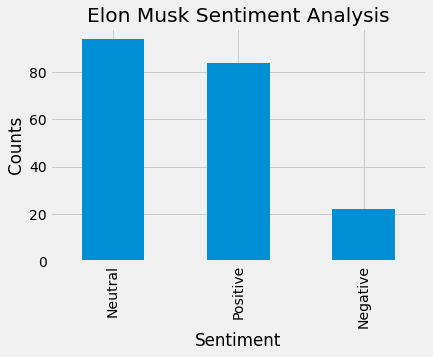

In [15]:
dframe['Analysis'].value_counts()

plt.title('Elon Musk Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dframe['Analysis'].value_counts().plot(kind='bar')
plt.show()
